네이버 영화리뷰데이터

- 200,000만개의 네이버 영화 리뷰 데이터
- 긍정(1), 부정(0) 라벨로 구성

In [1]:
import pandas as pd

train_data=pd.read_table("./data/ratings_train.txt")
test_data=pd.read_table("./data/ratings_test.txt")

print(len(train_data))
print(len(test_data))

150000
50000


In [2]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
train_data["label"].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [4]:
test_data["label"].value_counts()

1    25173
0    24827
Name: label, dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [6]:
#결측치가 하나라도 있으면 True 반환
train_data.isnull().values.any()

True

In [7]:
#결측치 개수 확인
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [8]:
#결측치 있는 문서 확인
train_data.loc[train_data["document"].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [12]:
#결측치 제거
# train_data.isnull().values.any() 사용
train_data=train_data.dropna()

train_data.isnull().values.any()

False

In [13]:
test_data=test_data.dropna()

test_data.isnull().values.any()

False

In [14]:
# 공백과 한글을 제외한 모든 문자를 제거
train_data["document"]=train_data["document"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")

C:\Users\SMT063\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [16]:
# 공백과 한글을 제외한 모든 문자를 제거
test_data["document"]=test_data["document"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]","")

C:\Users\SMT063\anaconda3\envs\deep\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
train_data.loc[train_data["document"]==""]

,id,document,label
584,7117896,,0
593,6478189,,0
638,9364602,,0
668,1600635,,0
1058,5890638,,0
...,...,...,...
149358,6780491,,0
149364,8014701,,1
149718,7690797,,1
149862,7175749,,0


In [19]:
# 내용이 없는 컬럼 제거
train_data=train_data[train_data["document"]!=""]

train_data.loc[train_data["document"]==""]

,id,document,label


In [20]:
# 내용이 없는 컬럼 제거
test_data=test_data[test_data["document"]!=""]

test_data.loc[test_data["document"]==""]

,id,document,label


토큰화를 수행하고 불용어 (stopword) 제거

In [21]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [22]:
import konlpy
from konlpy.tag import Okt

okt=Okt()

X_train=[]

# document 컬럼을 하나씩 읽어옴
for sentence in train_data["document"]:
    tempX=[]
    
    # 형태소 분리
    #stem : 정규화 수행(만들다,만드는,만들어서-> 만들다)
    tempX=okt.morphs(sentence,stem=True)
    
    # 분리된 값에서 불용어를 제거
    # tempX에서 분리된 단어(word)를 가져와서 해당 단어(word)가 stopword에 속해있지 않다면
    # word에 저장하고 tempX에 저장
    tempX=[word for word in tempX if not word in stopwords]
    
    X_train.append(tempX)

In [23]:
X_train

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정'],
 ['사이',
  '몬페',
  '그',
  '익살스럽다',
  '연기',
  '돋보이다',
  '영화',
  '스파이더맨',
  '에서',
  '늙다',
  '보이다',
  '커스틴',
  '던스트',
  '너무나도',
  '이쁘다',
  '보이다'],
 ['막',
  '걸음',
  '마',
  '떼다',
  '세',
  '부터',
  '초등학교',
  '학년',
  '생인',
  '살다',
  '영화',
  'ㅋㅋㅋ',
  '별',
  '반개',
  '아깝다',
  '움'],
 ['원작', '긴장감', '을', '제대로', '살리다'],
 ['별',
  '반개',
  '아깝다',
  '욕',
  '나오다',
  '이응경',
  '길용우',
  '연',
  '기',
  '생활',
  '몇',
  '년',
  '인지',
  '정말',
  '발',
  '로',
  '해도',
  '그것',
  '보단',
  '낫다',
  '납치',
  '감금',
  '만',
  '반복',
  '반복',
  '드라마',
  '가족',
  '없다',
  '연기',
  '못',
  '사람',
  '만',
  '모',
  '엿',
  '네'],
 ['액션', '없다', '재미', '있다', '몇', '안되다', '영화'],
 ['왜케',
  '평점',
  '낮다',
  '꽤',
  '볼',
  '만',
  '데',
  '헐리우드',
  '식',
  '화려하다',
  '너무',
  '길들이다',
  '있다'],
 ['인피니트', '짱', '이다', '진짜', '짱', '이다'],
 ['볼때',
  '마다',
  '눈물나다'

In [29]:
y_train=train_data["label"]
y_test=test_data["label"]

In [24]:
import konlpy
from konlpy.tag import Okt

okt=Okt()

X_test=[]

# document 컬럼을 하나씩 읽어옴
for sentence in test_data["document"]:
    tempX=[]
    
    # 형태소 분리
    #stem : 정규화 수행(만들다,만드는,만들어서-> 만들다)
    tempX=okt.morphs(sentence,stem=True)
    
    # 분리된 값에서 불용어를 제거
    # tempX에서 분리된 단어(word)를 가져와서 해당 단어(word)가 stopword에 속해있지 않다면
    # word에 저장하고 tempX에 저장
    tempX=[word for word in tempX if not word in stopwords]
    
    X_test.append(tempX)

인코딩

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer

# 사용할 전체 단어 수
max_features=35000

token=Tokenizer(num_words=max_features) #상위 35000개 단어만 추출

#인코딩을 위한 데이터 분석
token.fit_on_texts(X_train)

#분석한 결과를 이용해서 인코딩을 수행
X_train=token.texts_to_sequences(X_train)
X_test=token.texts_to_sequences(X_test)

In [26]:
X_train[:3]

[[50, 457, 16, 260, 660],
 [919, 459, 41, 599, 1, 214, 1455, 24, 965, 676, 19],
 [386, 2452, 25024, 2319, 5676, 2, 221, 9]]

입력 데이터의 크기를 동일하게 잘라줌

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_word=30

X_train=pad_sequences(X_train,maxlen=max_word)
X_test=pad_sequences(X_test,maxlen=max_word)

신경망 초기화

In [28]:
import numpy as np
import tensorflow as tf

seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

신경망 설계

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Flatten,LSTM
model=Sequential()

model.add(Embedding(max_features,50,input_length=max_word))

model.add(LSTM(128))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 50)            1750000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,845,809
Trainable params: 1,845,809
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["acc"])

In [33]:
h=model.fit(X_train,y_train,epochs=10,batch_size=50,
           validation_data=(X_test,y_test))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2983/2984 [============================>.] - ETA: 0s - loss: 0.3767 - acc: 0.8288WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001DF8126B620> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

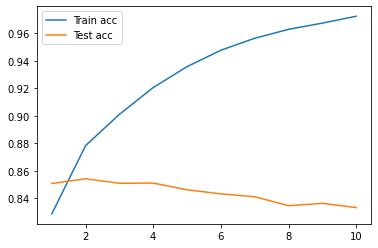

In [34]:
import matplotlib.pyplot as plt
epoch=range(1,11)

plt.plot(epoch,h.history["acc"],label="Train acc")
plt.plot(epoch,h.history["val_acc"],label="Test acc")
plt.legend()

In [36]:
import numpy as np

index = 12

pred = model.predict(X_test[index])

print(y_test[index])

print(np.where(np.average(pred) > .56, "긍정", "부정"))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1
긍정
